In [21]:
%matplotlib inline
import numpy as np
import random
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import entropy as scent
from matplotlib import gridspec
import matplotlib.image as mpimg

import collections

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

#t_outs = test_dict['outputs']

#for t_i in range(t_outs.shape[0]): 
#    t_outs[t_i] = softmax(t_outs[t_i])
    
bins = np.load('human_bincounts.npy')
humans = bins / np.sum(bins, axis = 1)[:, np.newaxis]
humans_smoothed = (bins +1) / np.sum(bins, axis = 1)[:, np.newaxis]

ordered_filenames = np.load('decoded_test_filename_order.npy')

labels = ['P', 'A', 'B', 'C', 'De', 'Do', 'F', 'H', 'S', 'T']

im_dir = '/home/battleday/Academic/Berkeley/Superman/local/images/test_images_named'

In [22]:
mod_files = os.listdir('.')
print(mod_files)
mod_files = sorted([m for m in mod_files if m[-4:] == '.npz'])
print(mod_files)

post_files = os.listdir('./post/')
print(post_files)
post_files = sorted([p for p in post_files if p[-4:] == '.npz'])
print(post_files)

['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'post', '.ipynb_checkpoints', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'entropy_fig-v1.ipynb', 'figs', 'decoded_test_filename_order.npy', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'human_bincounts.npy', 'pyramidnet_basic_110_270.npz', 'entropy_fig_v2.ipynb']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_270.npz', 'resnet_basic_110.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'vgg_15_BN_64.npz', 'wrn_28_10.npz']
['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'pyramidnet_basic_110_270.npz']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_270.npz', 'resnet_basic_110.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'vgg_15_B

In [23]:
model_dict = collections.OrderedDict()
for m in mod_files:
    raw = np.load(m)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    model_dict[m.split('.')[0]] = raw_outs
print(model_dict.keys())

odict_keys(['densenet_BC_100_12', 'pyramidnet_basic_110_270', 'resnet_basic_110', 'resnet_preact_bottleneck_164', 'resnext_29_8x64d', 'shake_shake_26_2x64d_SSI_cutout16', 'vgg_15_BN_64', 'wrn_28_10'])


In [24]:
post_dict = collections.OrderedDict()

for p in post_files:
    raw = np.load('./post/' + p)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    post_dict[p.split('.')[0]] = raw_outs
    
print(post_dict.keys())

odict_keys(['densenet_BC_100_12', 'pyramidnet_basic_110_270', 'resnet_basic_110', 'resnet_preact_bottleneck_164', 'resnext_29_8x64d', 'shake_shake_26_2x64d_SSI_cutout16', 'vgg_15_BN_64', 'wrn_28_10'])


[3849, 7078, 1198, 4148, 5608, 4285, 3320, 3661, 2754, 920]
addded rows: 8


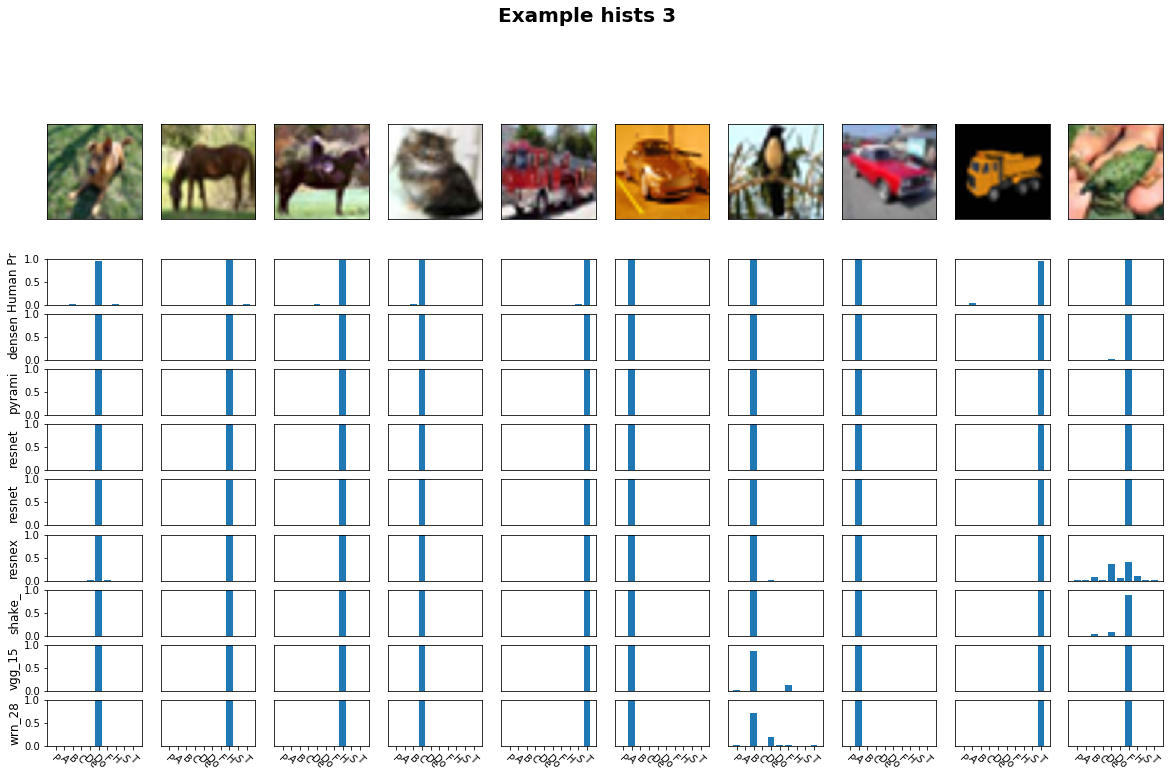

In [25]:
num_ims = 10
num_models = 8

#i = np.random.randint(10000)

sample = random.sample(range(0, 9999), num_ims)
print(sample)

added_rows = len(model_dict)
print('addded rows:', added_rows)
#model_dict = {'test': t_outs}

def fig_fn(title, save_path, ims, humans, model_dict,
           num_ims, added_rows, bolded_axes,
           base_rows = 3 + 1):
    """still a bunch of other things defined above
    that aren't in here.
    
    Model dict is ordered dict that includes humans"""
    
    fig = plt.figure(figsize=((num_ims) * 2, added_rows + base_rows)) 
    gs = gridspec.GridSpec(added_rows + base_rows, num_ims)
    
    fig.suptitle(title, fontsize = 20, fontweight='bold')
    
    for i in np.arange(num_ims):
        im = ims[i]
        ax_im_b = plt.subplot(gs[:3, i]) # size of im
        im_name_b = ordered_filenames[im]
        ax_im_b.xaxis.set_ticklabels([])
        ax_im_b.set_xticks([])
        ax_im_b.set_yticks([])
        #ax_im_b.set_title(labels[0], fontsize = 12)
        ax_im_b.yaxis.set_ticklabels([])
        img_b = mpimg.imread(im_dir + '/' + im_name_b)
        #ax_im_b.set_title('High certainty image', fontsize = 20)
        ax_im_b.imshow(img_b)


        im_guesses = humans[im]
        #print(im_guesses)
        ax_hist_b = plt.subplot(gs[3, i])
        ax_hist_b.bar(np.arange(10), im_guesses) #, align = 'left')
        ax_hist_b.set_xlim([-1, 10])
        ax_hist_b.set_ylim([0, 1]) 

        if ax_hist_b.is_first_col():
            if 0 in bolded_axes:
                ax_hist_b.set_ylabel('Human Pr', fontsize = 12, fontweight = 'bold')
            else:
                ax_hist_b.set_ylabel('Human Pr', fontsize = 12)
        
        else:
            ax_hist_b.yaxis.set_ticks([])

        ax_hist_b.xaxis.set_ticks([])

        for e, (key, value) in enumerate(model_dict.items()):
            im_guesses = value[im]
            #print(im_guesses)
            ax_hist_n = plt.subplot(gs[base_rows + (e), i])
            ax_hist_n.bar(np.arange(10), im_guesses) #, align = 'left')
            ax_hist_n.set_xlim([-1, 10])
            ax_hist_n.set_ylim([0, 1]) 

            if ax_hist_n.is_first_col():
                if (e + 1) in bolded_axes:
                    ax_hist_n.set_ylabel('{0}'.format(key)[:6], fontsize = 12, fontweight = 'bold') 
                else: 
                    ax_hist_n.set_ylabel('{0}'.format(key)[:6], fontsize = 12) 
                        # set to count
            else:
                ax_hist_n.yaxis.set_ticks([])
            ax_hist_n.xaxis.set_ticks([])

            if ax_hist_n.is_last_row():
                ax_hist_n.xaxis.set_ticks(np.arange(num_ims))
                ax_hist_n.xaxis.set_ticklabels(labels)
        
        plt.xticks(rotation = -45, ha='center')

    plt.savefig(save_path + '/' + title + '.png')

fig_fn('Example hists {0}'.format(np.random.randint(20)), 'figs', sample, humans, model_dict, num_ims, added_rows, [])


In [26]:
h_e = scent(humans.T)

print(h_e.shape)
ran = np.arange(20)/20
human_run = np.digitize(h_e, ran, right=False)
print(np.bincount(human_run, minlength=20))

(10000,)
[   0 4393 2337   25 1006  175  433  190  211  173  164  150   87  101  118
   77   71   45   33   46  165]


def dual_bin_all(arr_1, arr_2, num_bins=20, max_1 = True, norm = False):
    """bins coordinates"""
    if max_1:
        bins = (np.arange(num_bins)) / (num_bins)
    else:
        bins = np.arange(num_bins)
        
    arr_1_bin_idx = np.digitize(arr_1, bins, right=False)
    arr_2_bin_idx = np.digitize(arr_2, bins, right=False)

    grd = np.zeros((num_bins, num_bins))

    for i in np.arange(arr_1_bin_idx.shape[0]):
        grd[arr_1_bin_idx[i], arr_2_bin_idx[i]] += 1
      
    if norm:
        print(np.sum(grd))
        return grd / np.sum(grd)
    else:
        return grd
    

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 4)

for e, (key, value) in enumerate(model_dict.items()):
    r, c = np.unravel_index(e, (2, 4))
    
    ax = plt.subplot(gs[r, c])
    h_e = scent(humans.T)
    m_e = scent(value.T)
    grd = dual_bin_all(h_e, m_e)
    print(grd[1, 1])
    ax.matshow(grd[::-1], cmap = 'inferno')

511.02 1530.32
405.417 0.0
469.451 1678.89
510.245 1619.75
709.89 22988.7
343.754 1323.47
573.767 2106.34
543.787 1805.07


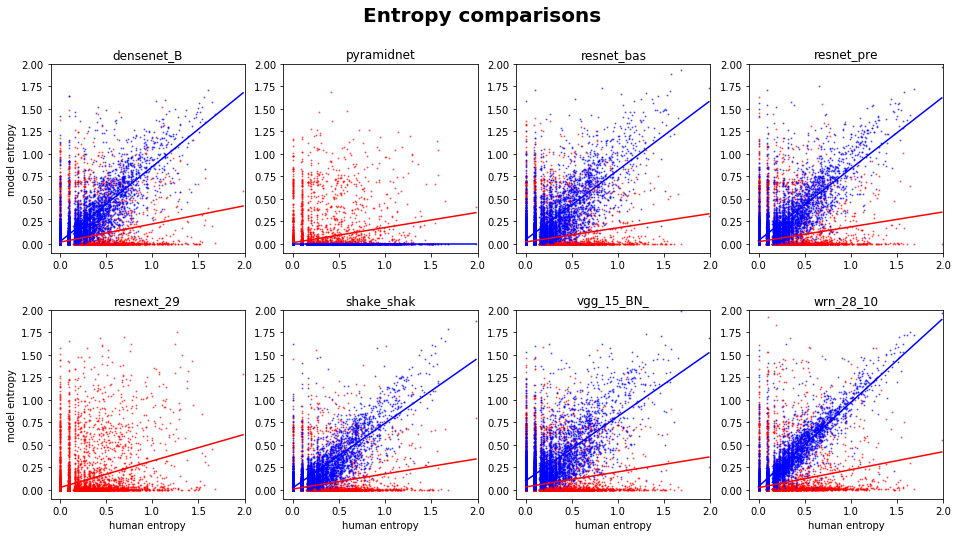

In [29]:

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 4) 
fig.suptitle('Entropy comparisons', fontsize = 20, fontweight='bold')
for e, (key, value) in enumerate(model_dict.items()):
    r, c = np.unravel_index(e, (2, 4))
    
    ax = plt.subplot(gs[r, c])
    h_e = scent(humans.T)
    m_e = scent(value.T)
    #print(np.sum(m_e))
    #grd = dual_bin_all(h_e, m_e)
    #print(grd)
    ax.scatter(h_e, m_e, s=1, alpha=0.5, c='r')
    ax.plot(np.unique(h_e), np.poly1d(np.polyfit(h_e, m_e, 1))(np.unique(h_e)), c='r')
    try:
        
        p_e = scent(post_dict[key].T)
        print(np.sum(m_e), np.sum(p_e))
        ax.scatter(h_e, p_e, s=1, alpha=0.5, c='b')
        ax.plot(np.unique(h_e), np.poly1d(np.polyfit(h_e, p_e, 1))(np.unique(h_e)), c='b')
    except:
        print('no post model for: {0}'.format(key))
    ax.set_title(key[:10])
    
    ax.set_xlim([-0.1, 2])
    ax.set_ylim([-0.1, 2])
    if ax.is_last_row():
        ax.set_xlabel('human entropy')
    
    if ax.is_first_col():
        ax.set_ylabel('model entropy')

fig.subplots_adjust(hspace=.3)
plt.savefig('figs/Basic entropy comparisons.png')